<a href="https://colab.research.google.com/github/atmos14D/EEE_Electrical_Electronic_Engineering_stuff/blob/main/Plots_MOSFET_ID_vs_VD_charac_BJT_Doping_Profiles%2BIdeal_Collector_Charact_with_Q_point.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Plots made using equations from text book: Solid State Electronic Devices 7th ed

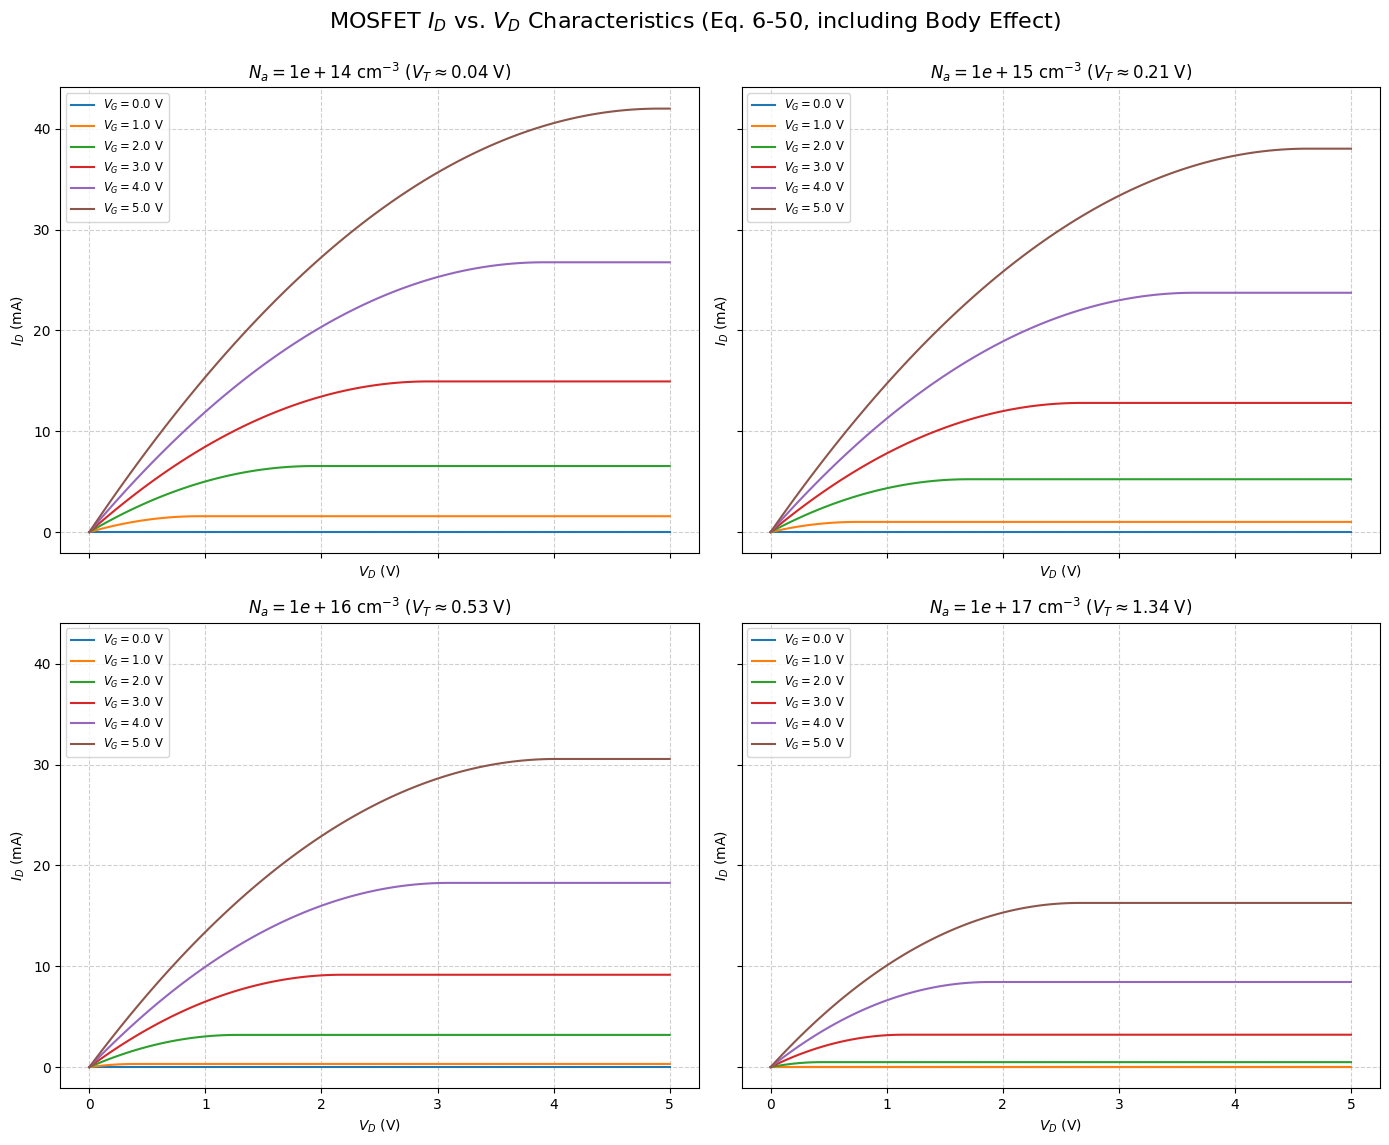


--- Key Calculated Parameters ---
Oxide Capacitance (Cox): 1.7265e-07 F/cm^2
Constant K' * Z/L: 3.4531e-03 A/V^2
Flat Band Voltage (V_FB): -0.464 V


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Constants (CGS) ---
q = 1.602e-19       # Elementary charge (C)
epsilon_0 = 8.854e-14 # Permittivity of vacuum (F/cm)
epsilon_s_si = 11.7 * epsilon_0 # Permittivity of Silicon (F/cm)
epsilon_ox = 3.9 * epsilon_0  # Permittivity of SiO2 (F/cm)
ni = 1.0e10         # Intrinsic carrier concentration (cm^-3)
Vt = 0.0259         # Thermal voltage kT/q at 300K (V)

# --- 2. Device Parameters (CGS) ---
mu_n = 1000.0       # Electron mobility (cm^2/V-s)
d_ox = 200.0e-8     # Oxide thickness (cm, 200 A)
Z = 100.0e-4        # Channel width (cm, 100 um)
L = 5.0e-4          # Channel length (cm, 5 um)
Qi = 5.0e11 * q     # Fixed interface charge (C/cm^2)

# --- 3. Pre-Calculated Constant Parameters ---
Cox = epsilon_ox / d_ox             # Oxide Capacitance (F/cm^2)
K_prime_ZL = mu_n * Cox * (Z / L)   # Constant factor for ID (A/V^2)
V_FB = -Qi / Cox                    # Flat Band Voltage (V)

# --- 4. Simulation Ranges ---
Na_values = np.array([1e14, 1e15, 1e16, 1e17]) # Substrate Doping (cm^-3)
Vg_values = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0]) # Gate Voltages (V)
Vd_array = np.linspace(0.0, 5.0, 101) # Drain Voltages (V)

# --- 5. Calculation and Plotting ---
fig, axes = plt.subplots(2, 2, figsize=(14, 12), sharex=True, sharey=True)
axes = axes.flatten()

for i, Na in enumerate(Na_values):
    # Calculate N-a dependent parameters
    phi_F = Vt * np.log(Na / ni)
    two_phi_F = 2.0 * phi_F

    # Body-effect constant term: gamma_prime = (2/3) * sqrt(2*epsilon_s*q*Na) / Cox
    gamma_prime = (2.0 / 3.0) * np.sqrt(2.0 * epsilon_s_si * q * Na) / Cox

    # Approximate Threshold Voltage (for plot title reference)
    V_T = V_FB + two_phi_F + (np.sqrt(2.0 * epsilon_s_si * q * Na * two_phi_F) / Cox)

    for Vg in Vg_values:
        Id_values = []
        max_Id = -1.0

        # Calculate Id for each Vd step
        for Vd in Vd_array:
            # Term 1: (Vg - V_FB - 2*phi_F - 0.5*Vd) * Vd
            term1 = (Vg - V_FB - two_phi_F - 0.5 * Vd) * Vd

            # Term 2 (Body Effect): gamma_prime * [(Vd + 2*phi_F)^(3/2) - (2*phi_F)^(3/2)]
            term2 = gamma_prime * (np.power(Vd + two_phi_F, 1.5) - np.power(two_phi_F, 1.5))

            # Full expression in curly brackets (must be >= 0)
            Id_term_curly = term1 - term2

            # Calculate Id. Clamp to 0 if the channel is off.
            Id = K_prime_ZL * max(0.0, Id_term_curly)

            # Saturation Modeling: Hold current constant once it reaches its peak (dID/dVd = 0)
            if Id >= max_Id:
                max_Id = Id
            else:
                Id = max_Id

            Id_values.append(Id * 1000.0) # Convert to mA for plotting

        # Plot I-D vs V-D for the current V-G
        axes[i].plot(Vd_array, Id_values, label=f'$V_G = {Vg:.1f}$ V')

    # --- Plot customization ---
    axes[i].set_title(f'$N_a = {Na:.0e}\\ \\mathrm{{cm}}^{{-3}}$ ($V_T \\approx {V_T:.2f}$ V)')
    axes[i].set_xlabel('$V_D$ (V)')
    axes[i].set_ylabel('$I_D$ (mA)')
    axes[i].grid(True, linestyle='--', alpha=0.6)
    axes[i].legend(loc='upper left', fontsize='small', framealpha=0.8)

# Finalize the plot display
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('MOSFET $I_D$ vs. $V_D$ Characteristics (Eq. 6-50, including Body Effect)', fontsize=16)
plt.show()

# Optional: Print key constants
print("\n--- Key Calculated Parameters ---")
print(f"Oxide Capacitance (Cox): {Cox:.4e} F/cm^2")
print(f"Constant K' * Z/L: {K_prime_ZL:.4e} A/V^2")
print(f"Flat Band Voltage (V_FB): {V_FB:.3f} V")

2√(D_B t_B) = 0.657 μm
2√(D_P t_P) = 0.104 μm
Emitter-base junction ≈ 0.233 μm
Base-collector junction ≈ 1.383 μm
Base width W_B ≈ 1.150 μm


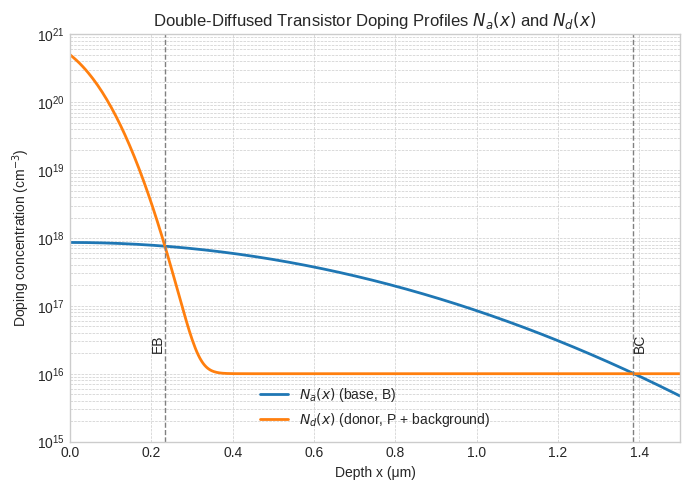

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

# -----------------------------
# Parameters from the problem
# -----------------------------

# Background donor (starting wafer)
Nd0 = 1e16  # cm^-3

# Base diffusion (Boron, limited source)
Ns_B = 5e13          # cm^-2
D_B = 3e-13          # cm^2/s  at 1100°C
t_B = 3600.0         # s (1 hr)

# Emitter diffusion (Phosphorus, constant source)
N0_P = 5e20          # cm^-3 (surface concentration)
D_P = 3e-14          # cm^2/s  at 1000°C
t_P = 900.0          # s (15 min)

# -----------------------------
# Derived quantities
# -----------------------------
# Characteristic diffusion lengths
L_B = 2.0 * np.sqrt(D_B * t_B)  # cm
L_P = 2.0 * np.sqrt(D_P * t_P)  # cm

print(f"2√(D_B t_B) = {L_B*1e4:.3f} μm")
print(f"2√(D_P t_P) = {L_P*1e4:.3f} μm")

# -----------------------------
# x-grid: 0 to 1.5 μm
# -----------------------------
x_um = np.linspace(0, 1.5, 400)     # μm (for plotting axis)
x_cm = x_um * 1e-4                  # convert to cm (for formulas)

# -----------------------------
# Doping profiles
# -----------------------------
# Base acceptor profile (limited source, Gaussian)
Na0 = Ns_B / np.sqrt(np.pi * D_B * t_B)
Na = Na0 * np.exp(-(x_cm / (2*np.sqrt(D_B * t_B)))**2)

# Emitter donor profile (constant source, erfc)
Nd_emitter = N0_P * erfc(x_cm / (2*np.sqrt(D_P * t_P)))

# Total donor profile (background + emitter)
Nd = Nd0 + Nd_emitter

# -----------------------------
# Find base region width (where Na > Nd)
# -----------------------------
diff = Na - Nd
sign_change_indices = np.where(np.diff(np.sign(diff)) != 0)[0]

if len(sign_change_indices) >= 2:
    i1, i2 = sign_change_indices[0], sign_change_indices[1]
    x_EB = x_um[i1]  # emitter-base junction (μm)
    x_BC = x_um[i2]  # base-collector junction (μm)
    W_B = x_BC - x_EB
    print(f"Emitter-base junction ≈ {x_EB:.3f} μm")
    print(f"Base-collector junction ≈ {x_BC:.3f} μm")
    print(f"Base width W_B ≈ {W_B:.3f} μm")
else:
    x_EB = x_BC = None
    print("Could not automatically find two junctions; check parameters/grid.")

# -----------------------------
# Plot on semilog y-axis
# -----------------------------
plt.figure(figsize=(7,5))
plt.semilogy(x_um, Na, label=r"$N_a(x)$ (base, B)", linewidth=2)
plt.semilogy(x_um, Nd, label=r"$N_d(x)$ (donor, P + background)", linewidth=2)

# Mark junctions if found
if x_EB is not None and x_BC is not None:
    plt.axvline(x_EB, color='gray', linestyle='--', linewidth=1)
    plt.axvline(x_BC, color='gray', linestyle='--', linewidth=1)
    plt.text(x_EB, 2e16, "EB", rotation=90, va='bottom', ha='right')
    plt.text(x_BC, 2e16, "BC", rotation=90, va='bottom', ha='left')

plt.xlabel("Depth x (μm)")
plt.ylabel("Doping concentration (cm$^{-3}$)")
plt.title("Double-Diffused Transistor Doping Profiles $N_a(x)$ and $N_d(x)$")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.ylim(1e15, 1e21)
plt.xlim(0, 1.5)

plt.tight_layout()
plt.show()

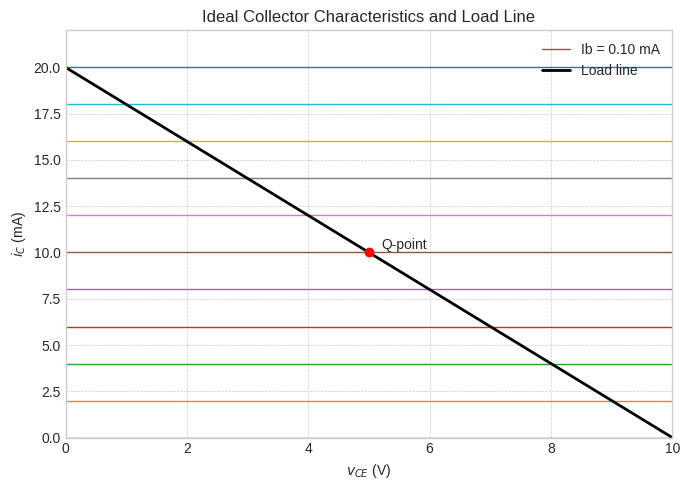

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

beta = 100
VCC = 10.0          # V
RC = 500.0          # ohms

# Base currents (A)
Ib_mA = np.arange(0, 0.22, 0.02)   # 0 to 0.2 mA
Ib = Ib_mA * 1e-3

Vce = np.linspace(0, 10, 200)      # V_CE from 0 to 10

plt.figure(figsize=(7,5))

# Plot collector characteristics (ideal, flat lines)
for ib in Ib:
    Ic = beta * ib * np.ones_like(Vce)
    label = rf"Ib = {ib*1e3:.2f} mA" if abs(ib-0.10e-3) < 1e-6 else None
    plt.plot(Vce, Ic*1e3, linestyle='-', linewidth=1,
             label=label)   # mA on vertical axis

# Load line: Ic = (VCC - Vce)/RC
Ic_load = (VCC - Vce) / RC   # A
plt.plot(Vce, Ic_load*1e3, 'k', linewidth=2, label='Load line')

# Mark Q-point for Ib = 0.1 mA
Ib_Q = 0.1e-3
Ic_Q = beta * Ib_Q
Vce_Q = VCC - Ic_Q * RC
plt.plot(Vce_Q, Ic_Q*1e3, 'ro')
plt.text(Vce_Q+0.2, Ic_Q*1e3, "Q-point", va='bottom')

plt.xlabel(r"$v_{CE}$ (V)")        # if you like, relabel as -v_CE
plt.ylabel(r"$i_C$ (mA)")
plt.title("Ideal Collector Characteristics and Load Line")
plt.ylim(0, 22)
plt.xlim(0, 10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()